# Chem 30324, Spring 2017, Homework 1

## Problem 1: Discrete, probably

In five card stud, a poker player is dealt five cards from a standard deck of 52 cards.

### 1. How many different 5-card hands are there?  (Remember, in poker the order in which the cards are received does *not* matter.)

In [63]:
def binomial(n,k):
   """Compute n factorial by a direct multiplicative method."""
   if k > n-k: k = n-k  # Use symmetry of Pascal's triangle
   accum = 1
   for i in range(1,k+1):
      accum *= (n - (k - i))
      accum /= i
   return accum

In [64]:
hands = binomial(52,5)

In [65]:
print('Number of hands = {0:8.0f}'.format(hands))

Number of hands =  2598960


### 2. What is the probability of being dealt four of a kind (a card of the same rank from each suit)?

In [66]:
fourofakind = 13. * 48. # number of 4-of-a-kinds times fifth card

In [67]:
print('Probability of 4-of-a-kind = {0:9.8f}'.format(fourofakind/hands))

Probability of 4-of-a-kind = 0.00024010


### 3. What is the probability of being dealt a flush (five cards of the same suit)?

In [68]:
flush = 4. * binomial(13,5)  # 4 suits times 5 cards from the suit

In [69]:
print('Probability of a flush = {0:9.8f}'.format(flush/hands))

Probability of a flush = 0.00198079


## Problem 2: Continuous, probably

The probability distribution function for a random variable $x$ is given by $P(x)=x e^{-2x}, 0\le x < \infty$.

### 1. Is $P(x)$ normalized?  If not, normalize it.  Plot the normalized $P(x)$.

P is not normalized, intergral =    0.25000


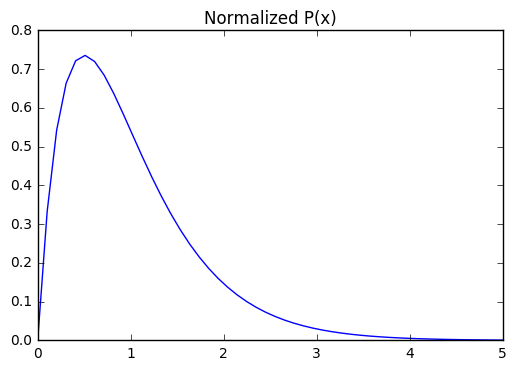

In [70]:
%matplotlib inline  
import numpy as np   # imports numerial python
from scipy.integrate import quad    # imports quadrature
import matplotlib.pyplot as plt     # imports plotting functions

def P(x):
    return x*np.exp(-2.*x)

N = quad(P,0,np.inf)

if (N[0] != 1.0):
    print("P is not normalized, intergral = {0:10.5f}".format(N[0]))
   
def Ptilde(x):
    return x*np.exp(-2.*x)/N[0]
    
x=np.linspace(0,5,50)
plt.plot(x,Ptilde(x))
plt.title("Normalized P(x)")

### 2. What is the most probable value of $x$?

In [71]:
from scipy.optimize import minimize
x0 = 1

def f(x):
    return -Ptilde(x)   # flip function over so we can use minimize

mostprobable=minimize(f,x0)
print("Maximum at x = {0:10.5f}".format(mostprobable.x[0]))

Maximum at x =    0.50000


### 3. What is the expectation value of $x$?

In [72]:
def integrand(x):
    return x*Ptilde(x)

expectx = quad(integrand,0,np.inf)
print("Expectation value = {0:10.5f}".format(expectx[0]))

Expectation value =    1.00000


### 4. What is the variance of $x$?

In [73]:
def integrand(x):
    return x*x*Ptilde(x)

expectx2 = quad(integrand,0,np.inf)

variance = expectx2[0]-expectx[0]*expectx[0]

print("variance = {0:10.5f}".format(variance))

variance =    0.50000


## Problem 3: One rough night

It's late on a Friday night and people are stumbling up Notre Dame Ave. to their dorms. You observe one particularly impaired individual who is taking steps of equal length \SI{1}{m} to the north or south (i.e., in one dimension), with equal probability.

### 1. What is the furthest distance the person could travel after 20 steps?

20 m

### 2. What is the probability that the person won't have traveled any net distance at all after 20 steps?

In [19]:
def paths(N,n): # N is the total number of steps, n is the distance from original point after N steps
   k=(N+n)//2 # the number of steps taken to the north
   """ compute binomial(N,k) """
   if n > N-k: n = N-k  # Use symmetry of Pascal's triangle
   accum = 1
   for i in range(1,k+1):
      accum *= (N - (k - i))
      accum /= i
   return accum

N=20 # the total number of steps
N1=paths(N,0)  # the number of all possible paths end at 0 after 20 steps
Ntotal=2**N # the total number of possible walks
print('Probability of travling 0 distance = {0:1.4f}'.format(N1/Ntotal)) # 20 steps, 0 distance

Probability of travling 0 distance = 0.1762


### 3. What is the probability that the person has traveled half the maximum distance after 20 steps?

In [20]:
N2=paths(N,N//2)
print('Probability of travling half the max distance = {0:1.4f}'.format(N2*2/Ntotal)) # 20 steps, ends at 10m & -10m

Probability of travling half the max distance = 0.0296


### 4. Plot the probability of traveling a given distance vs distance. Does the probability distribution look familiar?  You'll see it again when we talk about diffusion.

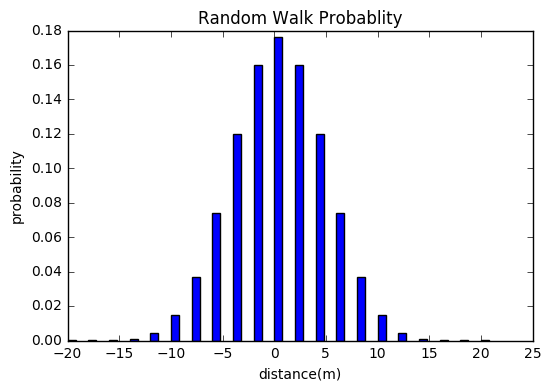

In [21]:
p=[]
for i in range (-N,N+1,2):
    p.append(paths(N,i)/Ntotal)
d=[]
for i in range (-N,N+1,2):
    d.append(i)
import matplotlib.pyplot as pl # draw the plot
pl.bar(d,p)
pl.xlabel('distance(m)')
pl.ylabel('probability')
pl.title('Random Walk Probablity')
pl.show()

## Problem 4: Now this is what I call equilibrium

The Boltzmann distribution tells us that, at thermal equilibrium, the probability of a particle having an energy $E$ is proportional to $\exp(-E/k_\text{B}T)$, where $k_\text{B}$ is the Boltzmann constant.  Suppose a bunch of gas particles of mass $m$ are in thermal equilibrium at temperature $T$ and are traveling back and forth in one dimension with various velocities $v$ and kinetic energies $K=mv^2/2$.

### 1. What is the expectation value of the velocity $v$ of a particle?

In [23]:
from sympy import * # import sympy for symbolic mathematics
v = symbols('v')
T,kB,m= symbols('T,kB,m',positive=True)
a=integrate(exp(-m*v**2/(2*kB*T)),(v,-oo,oo)) # integral
pprint(1/a) # normalization coefficient 

    √2⋅√m     
──────────────
          ____
2⋅√π⋅√T⋅╲╱ kB 


In [24]:
pprint(integrate(v*sqrt(m)/sqrt(2*pi*T*kB)*exp(-m*v*v/(2*kB*T)),(v,-oo,oo))) # <v>

0


### 2. What is the expectation value of the kinetic energy $K$ of a particle? How does your answer depend on the particle mass? On temperature?

In [25]:
pprint(integrate(1/2*m*v*v*sqrt(m)/sqrt(2*pi*T*kB)*exp(-m*v*v/(2*kB*T)),(v,-oo,oo))) # <1/2*m*v*v>

0.5⋅T⋅kB
